In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-dog-logs/download.txt


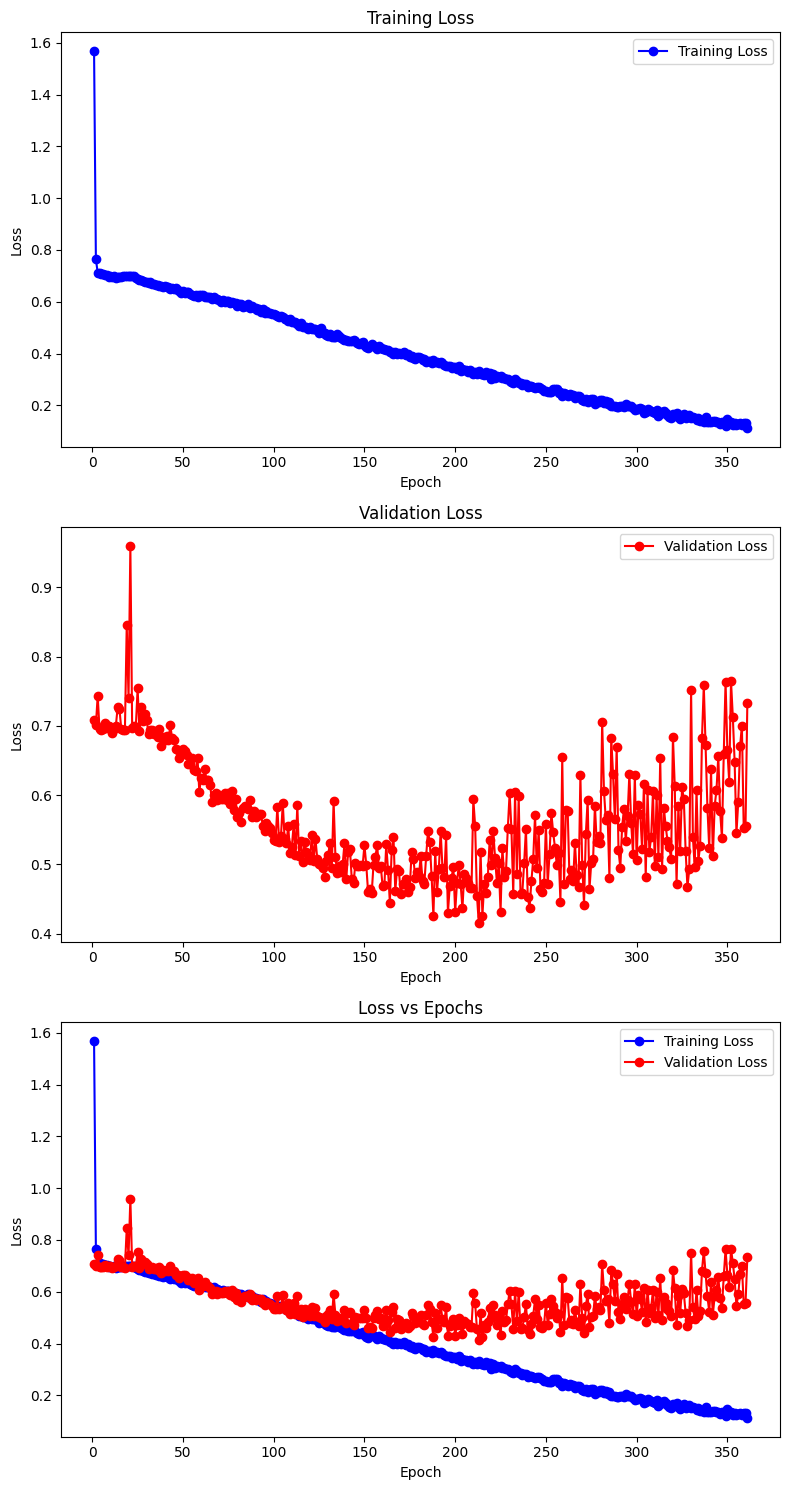

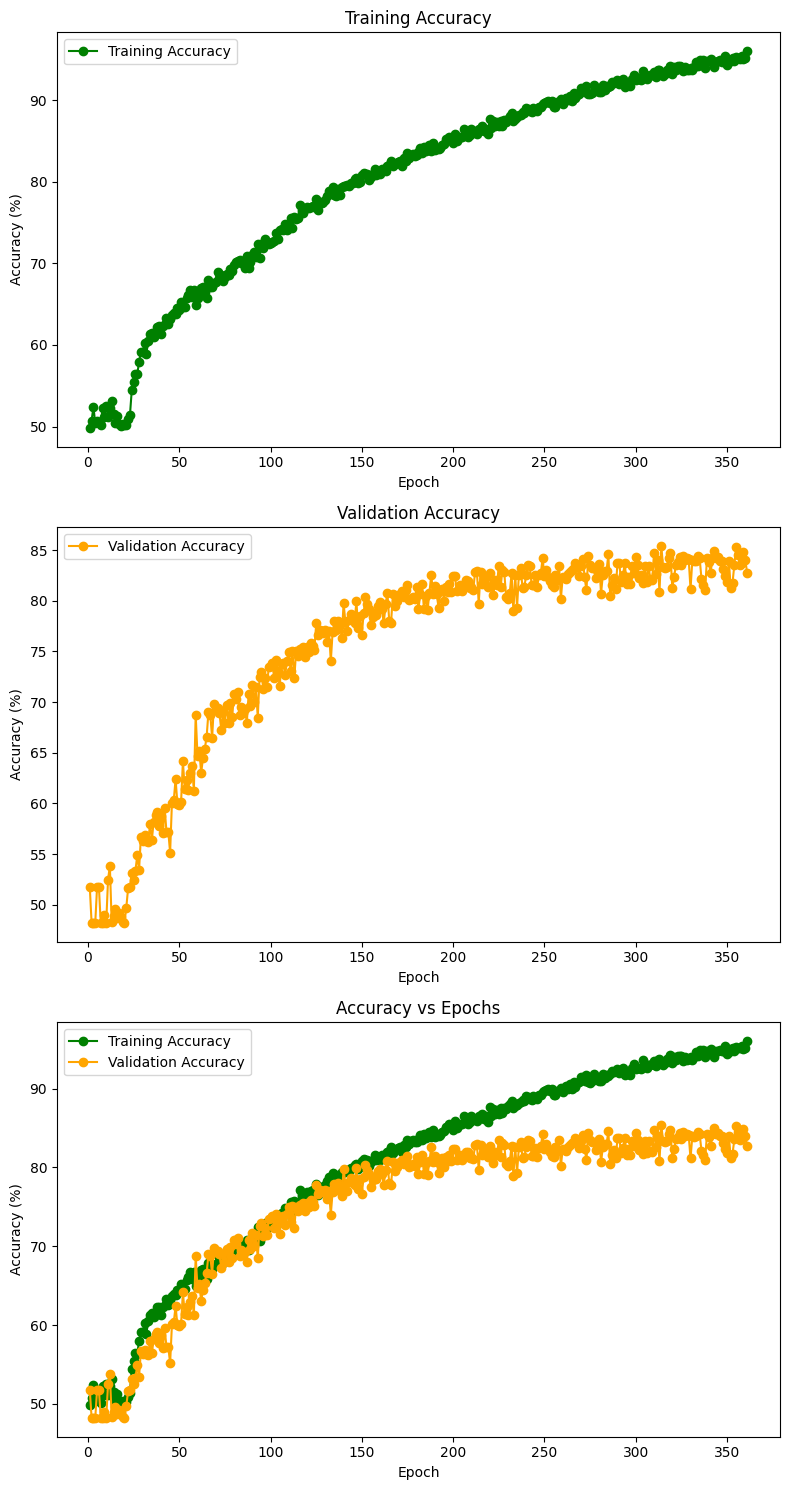

In [2]:

import matplotlib.pyplot as plt
import re

# Lists to store extracted values
epochs = []
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# File path to your log file
log_file_path = '/kaggle/input/cat-dog-logs/download.txt'

# Regular expressions to extract values
epoch_pattern = r"Epoch \[(\d+)/\d+\], Loss: ([\d\.]+), Accuracy: ([\d\.]+)%"
val_pattern = r"Validation Loss: ([\d\.]+), Validation Accuracy: ([\d\.]+)%"


# Read the log file
with open(log_file_path, 'r') as file:
    log_data = file.readlines()

# Extract training and validation data
for line in log_data:
    epoch_match = re.search(epoch_pattern, line)
    val_match = re.search(val_pattern, line)

    if epoch_match:
        epochs.append(int(epoch_match.group(1)))
        train_losses.append(float(epoch_match.group(2)))
        train_accuracies.append(float(epoch_match.group(3)))

    if val_match:
        val_losses.append(float(val_match.group(1)))
        val_accuracies.append(float(val_match.group(2)))

# Ensure validation lists are the same length as epochs
while len(val_losses) < len(epochs):
    val_losses.append(None)
while len(val_accuracies) < len(epochs):
    val_accuracies.append(None)

# Plotting
plt.figure(figsize=(8, 15))

# 1️⃣ Training Loss
plt.subplot(3, 1, 1)
plt.plot(epochs, train_losses, marker='o', label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# 2️⃣ Validation Loss
plt.subplot(3, 1, 2)
plt.plot(epochs, val_losses, marker='o', label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()

# 3️⃣ Combined Loss Plot
plt.subplot(3, 1, 3)
plt.plot(epochs, train_losses, marker='o', label='Training Loss', color='blue')
plt.plot(epochs, val_losses, marker='o', label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# New figure for accuracy
plt.figure(figsize=(8, 15))

# 4️⃣ Training Accuracy
plt.subplot(3, 1, 1)
plt.plot(epochs, train_accuracies, marker='o', label='Training Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.legend()

# 5️⃣ Validation Accuracy
plt.subplot(3, 1, 2)
plt.plot(epochs, val_accuracies, marker='o', label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.legend()

# 6️⃣ Combined Accuracy Plot
plt.subplot(3, 1, 3)
plt.plot(epochs, train_accuracies, marker='o', label='Training Accuracy', color='green')
plt.plot(epochs, val_accuracies, marker='o', label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()